In [1]:
import pandas as pd
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

Requirement already up-to-date: yfinance in d:\new folder\lib\site-packages (0.1.63)


In [4]:
tickers = pd. read_html( 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]


In [7]:
tickers = tickers.Symbol.to_list()

In [9]:
tickers = [i.replace('. ', '-') for i in tickers]

In [10]:
tickers

['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BF.B',
 'CHRW',
 'COG',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CM

In [12]:
tickers.pop(449)

'TRMB'

In [20]:
def RSIcalc(asset):
    df = yf.download (asset, start='2011-01-01')
    df [ 'MA200'] = df ['Adj Close'].rolling (window=200).mean() 
    df ['price change'] = df ['Adj Close'].pct_change()
    df ['Upmove'] = df['price change'].apply (lambda x: x if x > 0 else 0)
    df ['Downmove'] = df['price change'].apply(lambda x: abs(x) if x < 0 else 0)
    df ['avg Up'] = df ['Upmove'].ewm (span=19).mean() 
    df ['avg Down'] = df ['Downmove'].ewm (span=19).mean()
    df = df.dropna ()
    df ['RS'] = df['avg Up']/df['avg Down']
    df ['RSI'] = df ['RS'].apply(lambda x: 100-(100/(x+1)))
    df.loc [(df ['Adj Close'] > df [ 'MA200']) & (df['RSI'] < 30), 'Buy'] = 'Yes' 
    df.loc [(df ['Adj Close'] <df['MA200'])| (df ['RSI'] > 30), 'Buy'] = 'No' 
    return df

In [42]:
def getSignals (df):
    Buying_dates = []
    Selling_dates = []

    for i in range (len(df) - 11): 
        if "Yes" in df ['Buy'].iloc[i]: 
         Buying_dates.append(df.iloc [i+1].name)
         for j in range (1,11):
             if df ['RSI'].iloc[i+j] > 40: 
                 Selling_dates.append(df.iloc [i+j+1].name) 
                 break
             elif j == 10:
                 Selling_dates.append(df.iloc [i+j+1].name)

    return Buying_dates,Selling_dates

In [30]:
frame = RSIcalc(tickers [0])
buy, sell = getSignals (frame)

[*********************100%***********************]  1 of 1 completed


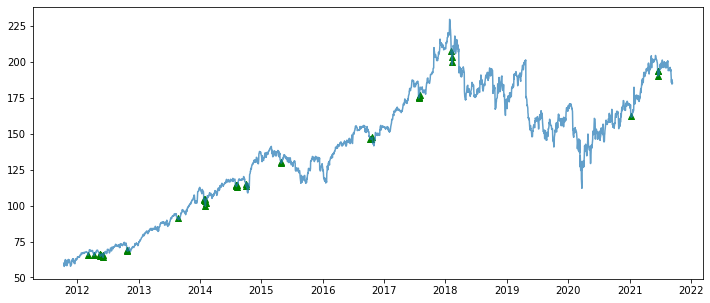

In [33]:
plt.figure(figsize=(12,5))
plt.scatter(frame. loc [buy].index, frame. loc [buy] ['Adj Close'], marker= '^', c='g')
plt.plot(frame ['Adj Close'], alpha=0.7)

In [36]:
Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values

In [38]:
Profits

array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
        0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
        0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
        0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
        0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
        0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
        0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
        0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925])

In [39]:
wins = [ i for i in Profits if i > 0]

In [40]:
len(wins)/len(Profits)

0.825

In [41]:
len(Profits)

40

In [45]:
matrixsignals = [] 
matrixprofits = []

for i in range (len (tickers)):
    frame = RSIcalc(tickers [i])
    buy, sell = getSignals (frame)
    Profits = (frame.loc[sell].Open.values - frame.loc[buy].Open.values)/frame.loc[buy].Open.values
    matrixsignals.append(buy)
    matrixprofits.append(Profits)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

ValueError: cannot set a frame with no defined index and a scalar

In [46]:
matrixprofits

[array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
         0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
         0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
         0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
         0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
         0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
         0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
         0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925]),
 array([ 0.00510516,  0.01262467,  0.01472686,  0.01312257,  0.02038221,
        -0.03436418, -0.0335724 , -0.05415482, -0.03402538, -0.02740112,
        -0.0387374 , -0.00815847,  0.00245366,  0.00629446,  0.01406515,
         0.00132554, -0.00132203,  0.02219214,  0.01586875,  0.01989325,
         0.01521374, -0.04413906,  0.03145364, -0.04377347, -0.02313925,
        -0.00142512, -0.00189929,  0.01154956,  0

In [48]:
matrixprofits

[array([ 0.01841858,  0.01323802, -0.0115183 , -0.01105814,  0.00212315,
         0.01287556,  0.03632401,  0.02847867,  0.01033357,  0.01558087,
         0.01012236, -0.00346098,  0.00108178, -0.00407378,  0.02345979,
         0.01052883,  0.02759942,  0.00556546,  0.00556546,  0.01286469,
         0.0062834 ,  0.01170129,  0.01861865,  0.01306246,  0.0130085 ,
         0.01320242, -0.00076654,  0.00355307, -0.01841872,  0.01366927,
         0.02033747,  0.01195283,  0.01595001,  0.00852711,  0.02154845,
         0.00861573,  0.01892706, -0.0052846 ,  0.01409035,  0.01120925]),
 array([ 0.00510516,  0.01262467,  0.01472686,  0.01312257,  0.02038221,
        -0.03436418, -0.0335724 , -0.05415482, -0.03402538, -0.02740112,
        -0.0387374 , -0.00815847,  0.00245366,  0.00629446,  0.01406515,
         0.00132554, -0.00132203,  0.02219214,  0.01586875,  0.01989325,
         0.01521374, -0.04413906,  0.03145364, -0.04377347, -0.02313925,
        -0.00142512, -0.00189929,  0.01154956,  0

In [50]:
allprofit = []

for i in matrixprofits:
    for e in i:
        allprofit.append(e)

In [52]:
wins = [i for i in allprofit if i > 0]

In [54]:
len(wins)/len(allprofit)

0.7241379310344828

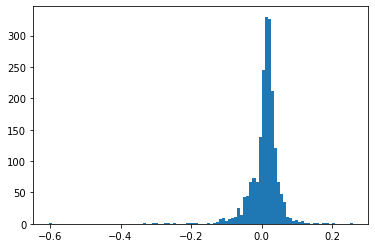

In [55]:
plt.hist(allprofit,bins=100)
plt.show()

In [56]:
for i in matrixsignals:
    for e in i:
        if e.year == 2021:
            print(e)

2021-01-12 00:00:00
2021-06-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-03-05 00:00:00
2021-03-09 00:00:00
2021-05-05 00:00:00
2021-01-28 00:00:00
2021-05-06 00:00:00
2021-05-07 00:00:00
2021-05-10 00:00:00
2021-05-11 00:00:00
2021-05-12 00:00:00
2021-05-13 00:00:00
2021-05-14 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-06-23 00:00:00
2021-06-24 00:00:00
2021-03-05 00:00:00
2021-08-05 00:00:00
2021-06-18 00:00:00
2021-06-29 00:00:00
2021-06-30 00:00:00
2021-07-01 00:00:00
2021-07-07 00:00:00
2021-07-08 00:00:00
2021-07-09 00:00:00
2021-02-19 00:00:00
2021-03-09 00:00:00
2021-02-01 00:00:00
2021-02-17 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-04-21 00:00:00
2021-04-23 00:00:00
2021-06-18 00:00:00
2021-06-21 00:00:00
2021-08-02 00:00:00
2021-08-03 00:00:00
2021-08-12 00:00:00
2021-08-16 00:00:00
2021-06-21 00:00:00
2021-06-30 00:00:00
2021-04-21 00:00:00
2021-04-23 00:00:00
2021-06-29 00:00:00
2021-06-30 00:00:00
2021-07-01 00:00:00
2021-07-08 00:00:00
